In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from scipy import stats
import statistics
from scipy.stats import mannwhitneyu
import statsmodels.api as sm

In [141]:
#загрузка данных
df = pd.read_csv (r"https://raw.githubusercontent.com/Borlukos/Python/refs/heads/main/marketing_AB.csv")

In [263]:
df.head(10)

,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
0,0,1069124,ad,0,130,Monday,20
1,1,1119715,ad,0,93,Tuesday,22
2,2,1144181,ad,0,21,Tuesday,18
3,3,1435133,ad,0,355,Tuesday,10
4,4,1015700,ad,0,276,Friday,14
5,5,1137664,ad,0,734,Saturday,10
6,6,1116205,ad,0,264,Wednesday,13
7,7,1496843,ad,0,17,Sunday,18
8,8,1448851,ad,0,21,Tuesday,19
9,9,1446284,ad,0,142,Monday,14


In [148]:
df.isnull().sum()

Unnamed: 0       0
user id          0
test group       0
converted        0
total ads        0
most ads day     0
most ads hour    0
dtype: int64

In [24]:
df['test group'].unique()

array(['ad', 'psa'], dtype=object)

In [253]:
df['converted'].unique()

array([0, 1], dtype=int64)

In [16]:
df['most ads day'].unique()

array(['Monday', 'Tuesday', 'Friday', 'Saturday', 'Wednesday', 'Sunday',
       'Thursday'], dtype=object)

In [18]:
df['most ads hour'].unique()

array([20, 22, 18, 10, 14, 13, 19, 11, 12, 16, 21,  3, 23,  4,  8,  0,  2,
       15,  1,  6, 17,  7,  9,  5], dtype=int64)

In [178]:
df['converted'] = df['converted'].apply(lambda x: 1 if x == True else 0)

In [182]:
#Всего 588101 наблюдений
print('Всего наблюдений',df['test group'].shape[0])
#Видели рекламу объявления
print('Видели рекламу объявления',df[df['test group']=='ad'].shape[0])
#Видели только социальную рекламу
print('Видели только социальную рекламу',df[df['test group']=='psa'].shape[0])
#Группа А видели рекламу объявления
group_a = df[df['test group']=='ad']
print('Группа А видели рекламу объявления',group_a.shape[0])
#Группа Б видели только социальную рекламу
group_b = df[df['test group']=='psa']
print('Группа Б видели только социальную рекламу',group_b.shape[0])
#Всего приобрели
print('Всего приобрели',df[df['converted']==1].shape[0])
#Группа А видели рекламу объявления и купили
print('Группа А видели рекламу объявления и купили',group_a[group_a['converted']==1].shape[0])
#Группа Б видели рекламу объявления и купили
print('Группа Б видели рекламу объявления и купили',group_b[group_b['converted']==1].shape[0])

Всего наблюдений 588101
Видели рекламу объявления 564577
Видели только социальную рекламу 23524
Группа А видели рекламу объявления 564577
Группа Б видели только социальную рекламу 23524
Всего приобрели 14843
Группа А видели рекламу объявления и купили 14423
Группа Б видели рекламу объявления и купили 420


# 1. Проанализировать группы клиентов и ответить на вопрос, какой тип рекламы был успешнее. 

# Конверсия.

In [184]:
print('Конверсия всего:', df[df['converted']==1].shape[0] / df['converted'].shape[0])
print('Конверсия группы А:', group_a[group_a['converted']==1].shape[0] / group_a.shape[0])
print('Конверсия группы Б:', group_b[group_b['converted']==1].shape[0] / group_b.shape[0])

Конверсия всего: 0.02523886203220195
Конверсия группы А: 0.025546559636683747
Конверсия группы Б: 0.01785410644448223


### Тестирование Т-тест
##### Нулевая гипотеза: Средняя конверсия группы A равна средней конверсии группы B.
##### Альтернативная гипотеза: Средняя конверсия группы A неравна средней конверсии группы B.

In [261]:
print(np.where(stats.ttest_ind(group_a['converted'], group_b['converted'])[1]<0.05, "Отвергаем нулевую гипотезу: Средняя конверсия группы A равна средней конверсии группы B", "Не отвергаем нулевую гипотезу: Средняя конверсия группы A неравна средней конверсии группы Б"))

Отвергаем нулевую гипотезу: Средняя конверсия группы A равна средней конверсии группы B


### Вывод: Существуют статистические значимые различия между конверсиями группы A и B

In [214]:
print(np.where(group_a[group_a['converted']==1].shape[0] / group_a.shape[0]>group_b[group_b['converted']==1].shape[0] / group_b.shape[0],'Конверсия группы А больше: Реклама объявлений привела к большим покупкам(группа А)','Конверсия группы Б больше: Социальная реклама привела к большим покупкам(группа Б)'))

Конверсия группы А больше: Реклама объявлений привела к большим покупкам(группа А)


# Вывод: реклама объявлений лучше чем социальная реклама.

# 2. Поиск гетерогенных эффектов

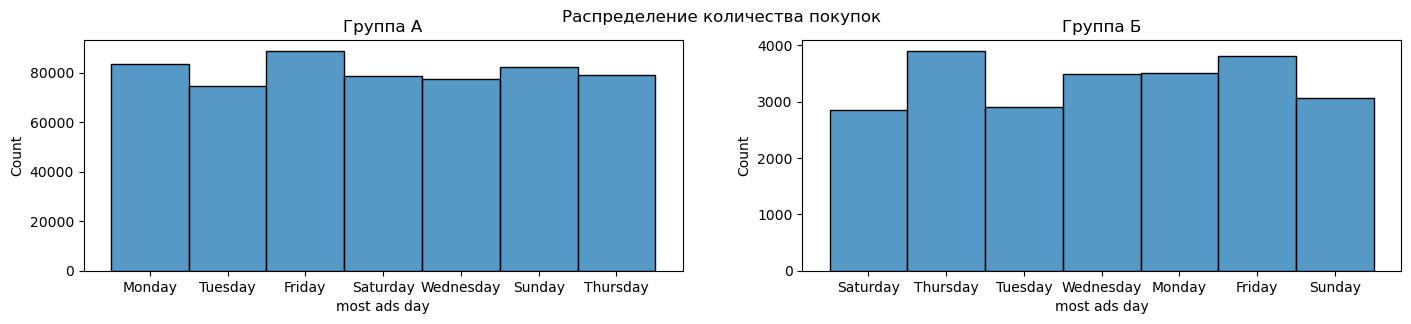

In [272]:
fig, ax = plt.subplots(1,2, figsize = (17,3))
plt.suptitle('Распределение количества покупок')
sns.histplot(group_a['most ads day'], ax = ax[0])
sns.histplot(group_b['most ads day'], ax = ax[1])
ax[0].set_title('Группа А')
ax[1].set_title('Группа Б')
plt.show()

In [276]:
group_a.groupby('most ads day')['converted'].mean()

most ads day
Friday       0.022465
Monday       0.033241
Saturday     0.021307
Sunday       0.024620
Thursday     0.021637
Tuesday      0.030440
Wednesday    0.025356
Name: converted, dtype: float64

In [354]:
group_b.groupby('most ads day')['converted'].mean()

most ads day
Friday       0.016303
Monday       0.022559
Saturday     0.013996
Sunday       0.020595
Thursday     0.020230
Tuesday      0.014448
Wednesday    0.015759
Name: converted, dtype: float64

### Значимость эффекта в определенный день недели.

In [524]:
print(np.where(stats.ttest_ind(group_a[group_a['most ads day']=='Friday']['converted'], group_b[group_b['most ads day']=='Friday']['converted'])[1]<0.05, "Отвергаем нулевую гипотезу: Средняя конверсия группы A равна средней конверсии группы B", "Не отвергаем нулевую гипотезу: Средняя конверсия группы A неравна средней конверсии группы Б"))
print(np.where(group_a[group_a['most ads day']=='Friday']['converted'].mean()>group_b[group_b['most ads day']=='Friday']['converted'].mean(),'Конверсия группы А больше: Реклама объявлений привела к большим покупкам(группа А)','Конверсия группы Б больше: Социальная реклама привела к большим покупкам(группа Б)'))

Отвергаем нулевую гипотезу: Средняя конверсия группы A равна средней конверсии группы B
Конверсия группы А больше: Реклама объявлений привела к большим покупкам(группа А)


In [526]:
print(np.where(stats.ttest_ind(group_a[group_a['most ads day']=='Monday']['converted'], group_b[group_b['most ads day']=='Monday']['converted'])[1]<0.05, "Отвергаем нулевую гипотезу: Средняя конверсия группы A равна средней конверсии группы B", "Не отвергаем нулевую гипотезу: Средняя конверсия группы A неравна средней конверсии группы Б"))
print(np.where(group_a[group_a['most ads day']=='Monday']['converted'].mean()>group_b[group_b['most ads day']=='Monday']['converted'].mean(),'Конверсия группы А больше: Реклама объявлений привела к большим покупкам(группа А)','Конверсия группы Б больше: Социальная реклама привела к большим покупкам(группа Б)'))

Отвергаем нулевую гипотезу: Средняя конверсия группы A равна средней конверсии группы B
Конверсия группы А больше: Реклама объявлений привела к большим покупкам(группа А)


In [528]:
print(np.where(stats.ttest_ind(group_a[group_a['most ads day']=='Saturday']['converted'], group_b[group_b['most ads day']=='Saturday']['converted'])[1]<0.05, "Отвергаем нулевую гипотезу: Средняя конверсия группы A равна средней конверсии группы B", "Не отвергаем нулевую гипотезу: Средняя конверсия группы A неравна средней конверсии группы Б"))
print(np.where(group_a[group_a['most ads day']=='Saturday']['converted'].mean()>group_b[group_b['most ads day']=='Saturday']['converted'].mean(),'Конверсия группы А больше: Реклама объявлений привела к большим покупкам(группа А)','Конверсия группы Б больше: Социальная реклама привела к большим покупкам(группа Б)'))

Отвергаем нулевую гипотезу: Средняя конверсия группы A равна средней конверсии группы B
Конверсия группы А больше: Реклама объявлений привела к большим покупкам(группа А)


In [536]:
print(np.where(stats.ttest_ind(group_a[group_a['most ads day']=='Sunday']['converted'], group_b[group_b['most ads day']=='Sunday']['converted'])[1]<0.05, "Отвергаем нулевую гипотезу: Средняя конверсия группы A равна средней конверсии группы B", "Не отвергаем нулевую гипотезу: Средняя конверсия группы A неравна средней конверсии группы Б"))

Не отвергаем нулевую гипотезу: Средняя конверсия группы A неравна средней конверсии группы Б


In [538]:
print(np.where(stats.ttest_ind(group_a[group_a['most ads day']=='Thursday']['converted'], group_b[group_b['most ads day']=='Thursday']['converted'])[1]<0.05, "Отвергаем нулевую гипотезу: Средняя конверсия группы A равна средней конверсии группы B", "Не отвергаем нулевую гипотезу: Средняя конверсия группы A неравна средней конверсии группы Б"))

Не отвергаем нулевую гипотезу: Средняя конверсия группы A неравна средней конверсии группы Б


In [530]:
print(np.where(stats.ttest_ind(group_a[group_a['most ads day']=='Tuesday']['converted'], group_b[group_b['most ads day']=='Tuesday']['converted'])[1]<0.05, "Отвергаем нулевую гипотезу: Средняя конверсия группы A равна средней конверсии группы B", "Не отвергаем нулевую гипотезу: Средняя конверсия группы A неравна средней конверсии группы Б"))
print(np.where(group_a[group_a['most ads day']=='Tuesday']['converted'].mean()>group_b[group_b['most ads day']=='Tuesday']['converted'].mean(),'Конверсия группы А больше: Реклама объявлений привела к большим покупкам(группа А)','Конверсия группы Б больше: Социальная реклама привела к большим покупкам(группа Б)'))

Отвергаем нулевую гипотезу: Средняя конверсия группы A равна средней конверсии группы B
Конверсия группы А больше: Реклама объявлений привела к большим покупкам(группа А)


In [534]:
print(np.where(stats.ttest_ind(group_a[group_a['most ads day']=='Wednesday']['converted'], group_b[group_b['most ads day']=='Wednesday']['converted'])[1]<0.05, "Отвергаем нулевую гипотезу: Средняя конверсия группы A равна средней конверсии группы B", "Не отвергаем нулевую гипотезу: Средняя конверсия группы A неравна средней конверсии группы Б"))
print(np.where(group_a[group_a['most ads day']=='Wednesday']['converted'].mean()>group_b[group_b['most ads day']=='Wednesday']['converted'].mean(),'Конверсия группы А больше: Реклама объявлений привела к большим покупкам(группа А)','Конверсия группы Б больше: Социальная реклама привела к большим покупкам(группа Б)'))

Отвергаем нулевую гипотезу: Средняя конверсия группы A равна средней конверсии группы B
Конверсия группы А больше: Реклама объявлений привела к большим покупкам(группа А)


# Вывод: в дни недели Sunday и Thursday эффект от рекламы не значителен, во всех оставшихся днях эффект от показа рекламы объявлений значительно выше чем от социальной рекламы.